Importing Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading Data

In [11]:
df = pd.read_csv('data.csv', parse_dates=['Date'], na_values=['', ' '])

pd.read_csv(): Reads CSV file into DataFrame
    parse_dates=['Date']: Automatically converts 'Date' column to datetime format
    na_values=['', ' ']: Treats empty strings and spaces as missing values

Data Explorating

In [12]:
# Initial inspection
print("First 5 entries:")
display(df.head())

# Dataset structure
print("\nDataset structure:")
display(df.info())

# Statistical summary
print("\nStatistical summary:")
display(df.describe())

# Missing values check
print("\nMissing values count:")
display(df.isnull().sum())

First 5 entries:


,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0



Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


None


Statistical summary:


,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000



Missing values count:


Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

head(): Shows first 5 rows

info(): Displays column data types and non-null counts

describe(): Generates statistical summary for numerical columns

isnull().sum(): Counts missing values per column

display(): Pretty-prints DataFrames in Jupyter

Data Cleaning

In [13]:
# Remove duplicates
df_clean = df.drop_duplicates()

# Handle missing values
df_clean['Calories'] = df_clean['Calories'].fillna(df_clean['Calories'].median())
df_clean = df_clean.dropna(subset=['Date'])

# Fix data inconsistencies
mask = df_clean['Pulse'] > df_clean['Maxpulse']
df_clean.loc[mask, ['Pulse', 'Maxpulse']] = df_clean.loc[mask, ['Maxpulse', 'Pulse']].values

# Fix date formatting
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')

C:\Users\Asus\AppData\Local\Temp\ipykernel_12336\2102628514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Calories'] = df_clean['Calories'].fillna(df_clean['Calories'].median())


drop_duplicates(): Removes duplicate rows

fillna(): Fills missing values (using median here)

dropna(): Removes rows with missing values in specified columns

pd.to_datetime(): Ensures consistent date format

loc[]: Label-based indexing for conditional fixes

Data Selection

In [18]:
# Filter rows
high_duration = df_clean[df_clean['Duration'] > 60]

# Select columns
selected_data = df_clean[['Date', 'Duration', 'Calories']]

# Conditional selection
high_calories = df_clean.query('Calories > 300')

Boolean indexing (df[df['col'] > value]): Filters rows by condition

query(): SQL-like filtering syntax

Column selection: df[['col1', 'col2']]

Data Sorting

In [15]:
# Sort by date
df_sorted = df_clean.sort_values('Date')

# Sort by multiple columns
df_multi_sorted = df_clean.sort_values(['Duration', 'Calories'], ascending=[True, False])

sort_values(): Sorts DataFrame by column values

    ascending: Controls sort direction (True=ascending)

    Accepts list for multi-column sorting

Data Grouping

In [16]:
# Group by duration
duration_groups = df_clean.groupby('Duration').agg({
    'Calories': 'mean',
    'Pulse': ['min', 'max']
})

# Weekly aggregation
weekly_calories = df_clean.groupby(pd.Grouper(key='Date', freq='W'))['Calories'].sum()

groupby(): Groups data by specified column

agg(): Performs multiple aggregations

pd.Grouper(): Time-based grouping (weekly here)

sum()/mean(): Aggregation functions

Data Visualization

<Figure size 1200x600 with 0 Axes>

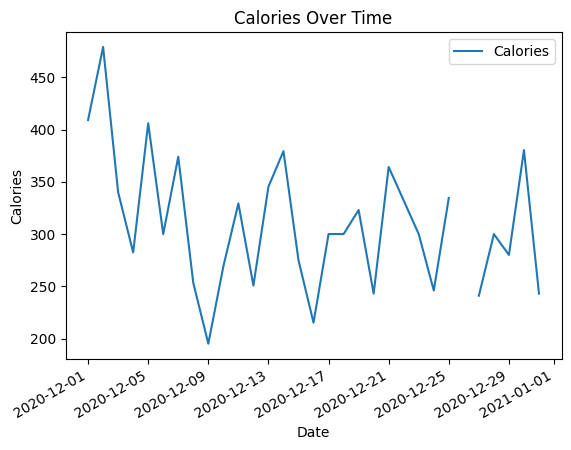

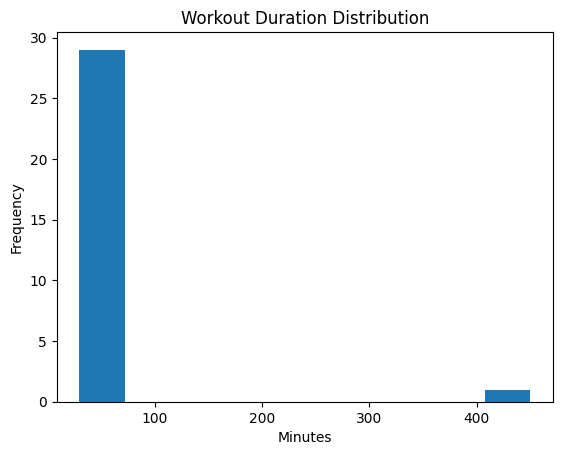

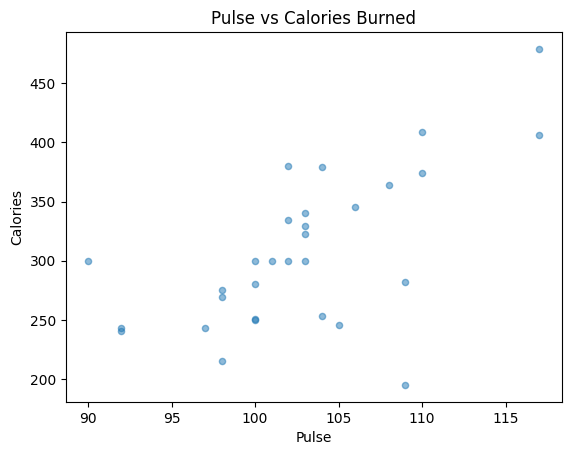

In [17]:
# Line plot
plt.figure(figsize=(12,6))
df_clean.plot(x='Date', y='Calories', kind='line', title='Calories Over Time')
plt.ylabel('Calories')
plt.show()

# Histogram
df_clean['Duration'].plot(kind='hist', bins=10, title='Workout Duration Distribution')
plt.xlabel('Minutes')
plt.show()

# Scatter plot
df_clean.plot(x='Pulse', y='Calories', kind='scatter', alpha=0.5)
plt.title('Pulse vs Calories Burned')
plt.show()

plot(): Pandas plotting wrapper

kind: Specifies plot type (line, bar, hist, etc.)

plt.figure(): Controls figure size

title()/xlabel()/ylabel(): Plot annotations